In [1]:
#!/usr/bin/env python
# coding: utf-8
# Author: Nelson Fernandez, Renault Research
# nelson.fernandez-pinto@renault.com

import sys,os
sys.path.append(os.getcwd())

# Imports
from dataset import *
from architectures import *
#from functions import *
from losses import *
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt 
%matplotlib inline

import torch
import torch.nn.functional as F
from torch.optim import Adam
from torch.autograd import Variable
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.manual_seed(7)


# Generate dataset
me = MazeExplorer(maze_size=(64,64), nbr_instances=30, 
                  difficulty='easy', nbr_trajectories=2,
                  alpha=17)

# Show deopping percentages
me.get_dopping_percentage()  # point level
me.get_dopping_percentage_trajectories() # trajectory level



# Get set of train/test INDEXES (hacking SKlean train_test_split)
x = np.arange(0, me.len())
train_indexes, test_indexes, _, _ = train_test_split(x, x, 
                                                    test_size=0.33, 
                                                    random_state=7)


# Wrap transforming function to dataset object
t_me = TransformedDataset(me, xy_transform=xy_transform)

# Get training/test subsets
train_me = Subset(t_me, indices=train_indexes)
test_me = Subset(t_me, indices=test_indexes)

# Configure dataloaders
batch_size = 1
num_workers = 4

trainloader = DataLoader(train_me, shuffle=True, 
                          batch_size=batch_size, 
                          num_workers=num_workers, 
                          pin_memory=True)


testloader = DataLoader(test_me, shuffle=True, 
                         batch_size=batch_size, 
                         num_workers=1,
                         pin_memory=True)

print('Train test data loaders created...')



100%|██████████| 30/30 [00:00<00:00, 938.67it/s]

Creating MazeExplorer dataset of difficulty easy
Using Prims generator
Using shortest path solver



 17%|█▋        | 20/120 [00:00<00:00, 193.91it/s]

Dataset generated... 120 available instances


 45%|████▌     | 54/120 [00:00<00:00, 531.59it/s]

Estimated dopping percentage (points) =  0.058


100%|██████████| 120/120 [00:00<00:00, 554.78it/s]

Estimated dopping percentage (trajectories)=  0.833
Train test data loaders created...


In [ ]:
# Create CNN model
net2 = ConvNet().to(device)
print('CNN created...')

# Init losses
rmse = RMSELoss()
graphic_loss = GraphicLoss()
road_loss = RoadLoss(k1=0.1)

# Set optimizer (Adam)
optimizer = Adam(net2.parameters(), lr=1e-3)
epochs = 200
print('Losses and optimizer created...')


Init training loop...


/anaconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Train Epoch: 1 [79/80 (99%)] EnvLoss: 0.035914  RMSELoss: 24.154339 TotalLoss: 24.190258


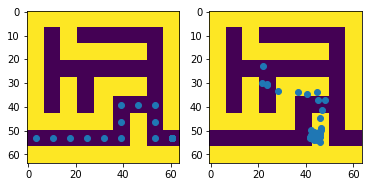

Train Epoch: 2 [79/80 (99%)] EnvLoss: 0.020365  RMSELoss: 19.372227 TotalLoss: 19.392588


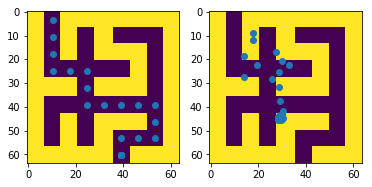

Train Epoch: 3 [79/80 (99%)] EnvLoss: 0.020599  RMSELoss: 17.148335 TotalLoss: 17.168934


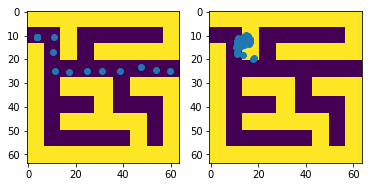

Train Epoch: 4 [79/80 (99%)] EnvLoss: 0.025087  RMSELoss: 15.217215 TotalLoss: 15.242302


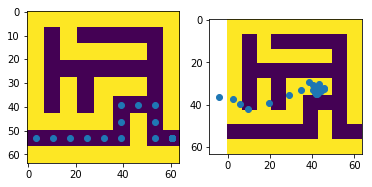

Train Epoch: 5 [79/80 (99%)] EnvLoss: 0.024925  RMSELoss: 12.419840 TotalLoss: 12.444765


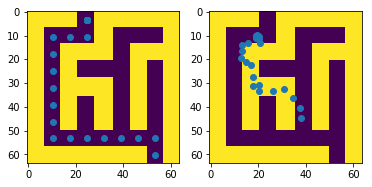

Train Epoch: 6 [79/80 (99%)] EnvLoss: 0.024228  RMSELoss: 12.406348 TotalLoss: 12.430576


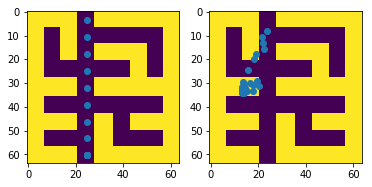

Train Epoch: 7 [79/80 (99%)] EnvLoss: 0.020440  RMSELoss: 10.275003 TotalLoss: 10.295442


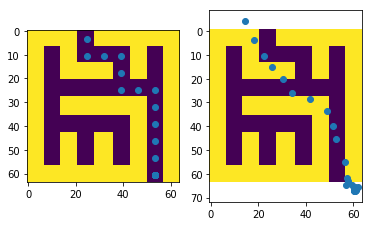

Train Epoch: 8 [79/80 (99%)] EnvLoss: 0.034161  RMSELoss: 9.934542 TotalLoss: 9.968702


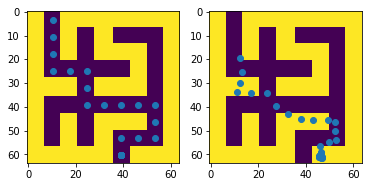

Train Epoch: 9 [79/80 (99%)] EnvLoss: 0.031176  RMSELoss: 9.384741 TotalLoss: 9.415915


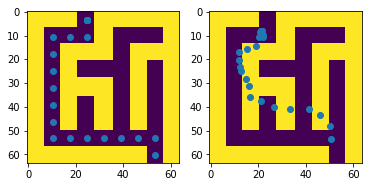

Train Epoch: 10 [79/80 (99%)] EnvLoss: 0.031332  RMSELoss: 9.216028 TotalLoss: 9.247360


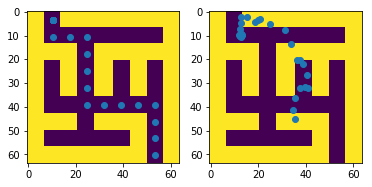

Train Epoch: 11 [79/80 (99%)] EnvLoss: 0.027433  RMSELoss: 9.225599 TotalLoss: 9.253032


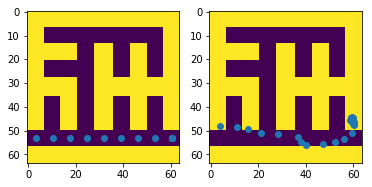

Train Epoch: 12 [79/80 (99%)] EnvLoss: 0.034902  RMSELoss: 8.682269 TotalLoss: 8.717171


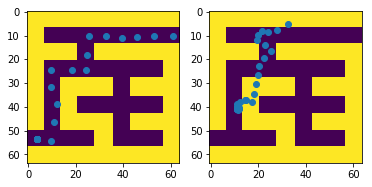

Train Epoch: 13 [79/80 (99%)] EnvLoss: 0.023592  RMSELoss: 8.340677 TotalLoss: 8.364267


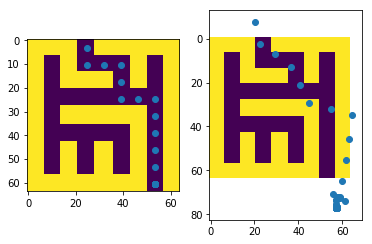

Train Epoch: 14 [79/80 (99%)] EnvLoss: 0.031918  RMSELoss: 7.506560 TotalLoss: 7.538481


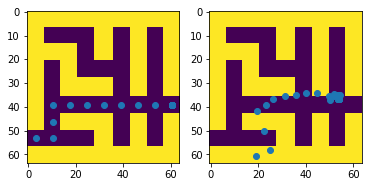

Train Epoch: 15 [79/80 (99%)] EnvLoss: 0.036005  RMSELoss: 7.798939 TotalLoss: 7.834944


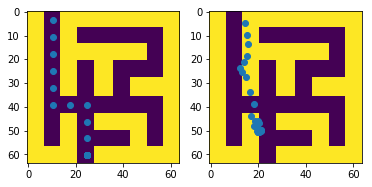

Train Epoch: 16 [79/80 (99%)] EnvLoss: 0.026257  RMSELoss: 7.443565 TotalLoss: 7.469823


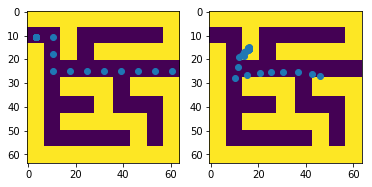

Train Epoch: 17 [79/80 (99%)] EnvLoss: 0.030945  RMSELoss: 6.826191 TotalLoss: 6.857137


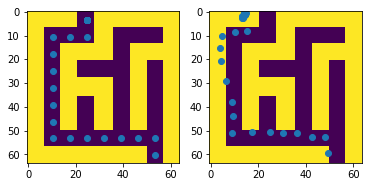

Train Epoch: 18 [79/80 (99%)] EnvLoss: 0.022533  RMSELoss: 6.965665 TotalLoss: 6.988197


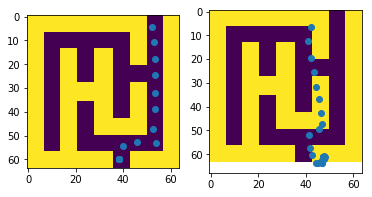

Train Epoch: 19 [79/80 (99%)] EnvLoss: 0.047336  RMSELoss: 7.604311 TotalLoss: 7.651649


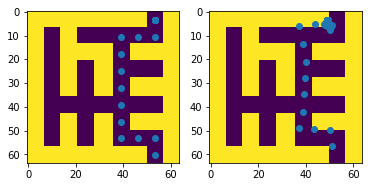

Train Epoch: 20 [79/80 (99%)] EnvLoss: 0.032671  RMSELoss: 6.742926 TotalLoss: 6.775598


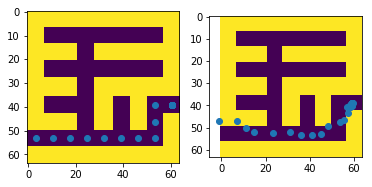

Train Epoch: 21 [79/80 (99%)] EnvLoss: 0.023412  RMSELoss: 6.801401 TotalLoss: 6.824814


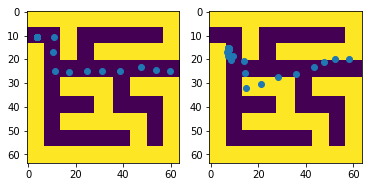

Train Epoch: 22 [79/80 (99%)] EnvLoss: 0.014764  RMSELoss: 6.400366 TotalLoss: 6.415128


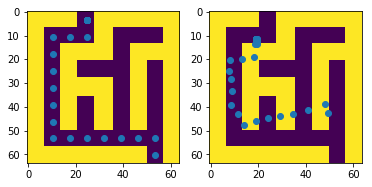

Train Epoch: 23 [79/80 (99%)] EnvLoss: 0.041318  RMSELoss: 6.227445 TotalLoss: 6.268763


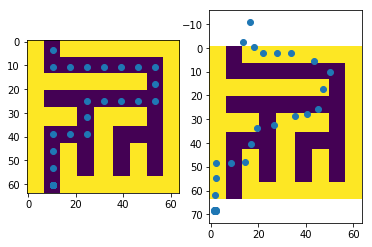

Train Epoch: 24 [79/80 (99%)] EnvLoss: 0.027534  RMSELoss: 6.143320 TotalLoss: 6.170852


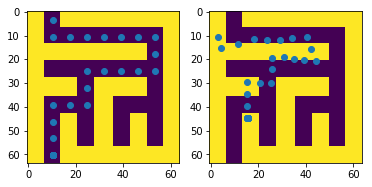

Train Epoch: 25 [79/80 (99%)] EnvLoss: 0.028201  RMSELoss: 5.981788 TotalLoss: 6.009990


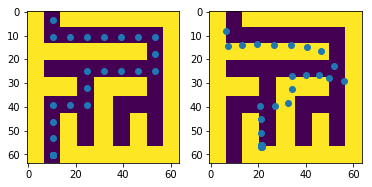

Train Epoch: 26 [79/80 (99%)] EnvLoss: 0.029025  RMSELoss: 6.440955 TotalLoss: 6.469979


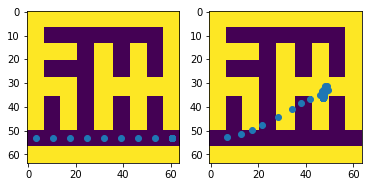

Train Epoch: 27 [79/80 (99%)] EnvLoss: 0.022391  RMSELoss: 6.395868 TotalLoss: 6.418260


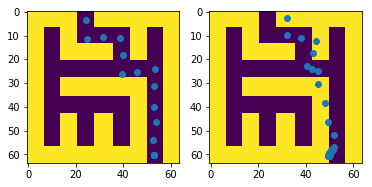

Train Epoch: 28 [79/80 (99%)] EnvLoss: 0.026594  RMSELoss: 6.324095 TotalLoss: 6.350689


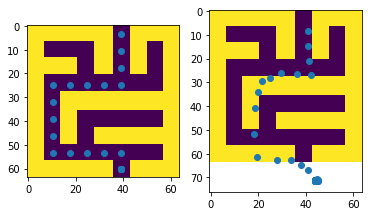

Train Epoch: 29 [79/80 (99%)] EnvLoss: 0.041861  RMSELoss: 5.907931 TotalLoss: 5.949793


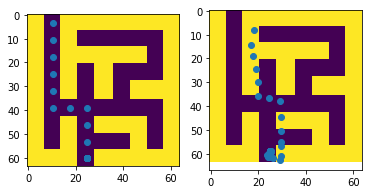

Train Epoch: 30 [79/80 (99%)] EnvLoss: 0.031706  RMSELoss: 6.490870 TotalLoss: 6.522578


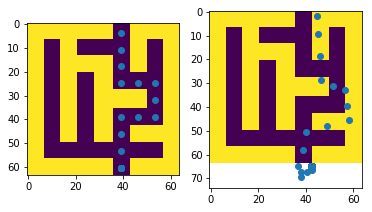

Train Epoch: 31 [79/80 (99%)] EnvLoss: 0.020833  RMSELoss: 6.540875 TotalLoss: 6.561707


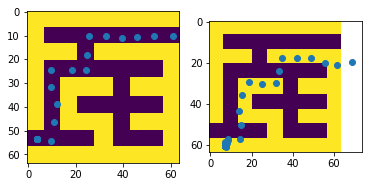

Train Epoch: 32 [79/80 (99%)] EnvLoss: 0.030190  RMSELoss: 5.845662 TotalLoss: 5.875851


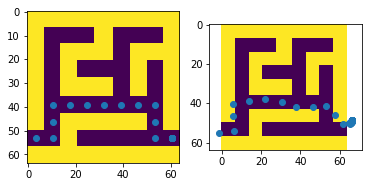

Train Epoch: 33 [79/80 (99%)] EnvLoss: 0.020068  RMSELoss: 5.843550 TotalLoss: 5.863619


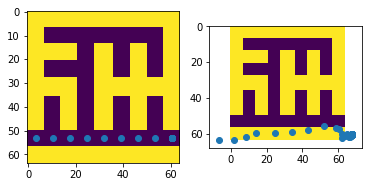

Train Epoch: 34 [79/80 (99%)] EnvLoss: 0.030740  RMSELoss: 5.416808 TotalLoss: 5.447547


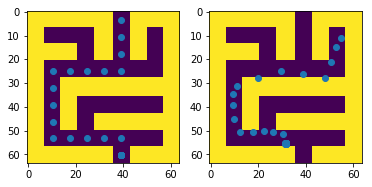

Train Epoch: 35 [79/80 (99%)] EnvLoss: 0.025110  RMSELoss: 5.239580 TotalLoss: 5.264692


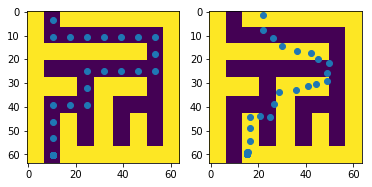

Train Epoch: 36 [79/80 (99%)] EnvLoss: 0.021021  RMSELoss: 5.463938 TotalLoss: 5.484958


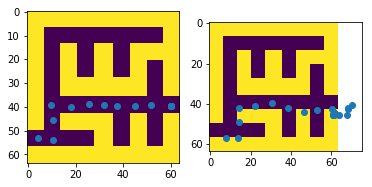

Train Epoch: 37 [79/80 (99%)] EnvLoss: 0.034898  RMSELoss: 5.858241 TotalLoss: 5.893139


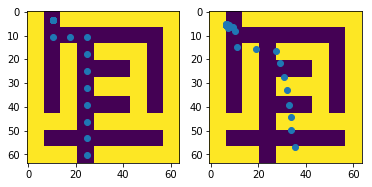

Train Epoch: 38 [79/80 (99%)] EnvLoss: 0.018842  RMSELoss: 4.903315 TotalLoss: 4.922156


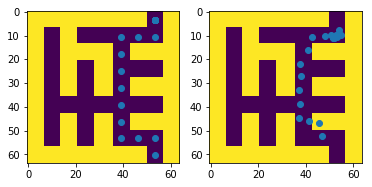

Train Epoch: 39 [79/80 (99%)] EnvLoss: 0.030139  RMSELoss: 5.719195 TotalLoss: 5.749335


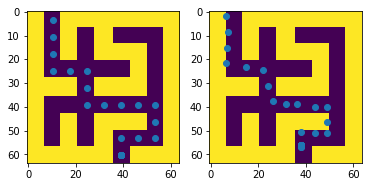

Train Epoch: 40 [79/80 (99%)] EnvLoss: 0.023720  RMSELoss: 4.794929 TotalLoss: 4.818649


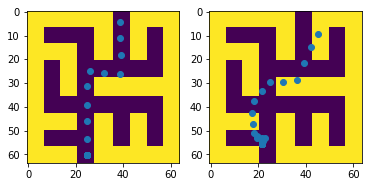

Train Epoch: 41 [79/80 (99%)] EnvLoss: 0.026843  RMSELoss: 4.958716 TotalLoss: 4.985560


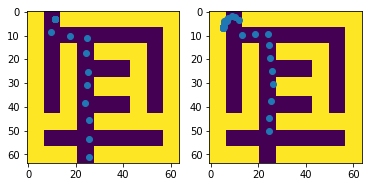

Train Epoch: 42 [79/80 (99%)] EnvLoss: 0.028841  RMSELoss: 4.400098 TotalLoss: 4.428940


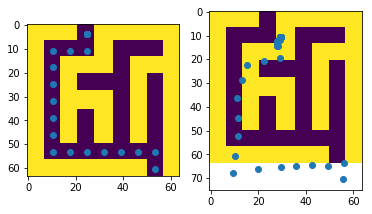

Train Epoch: 43 [79/80 (99%)] EnvLoss: 0.039777  RMSELoss: 4.912162 TotalLoss: 4.951938


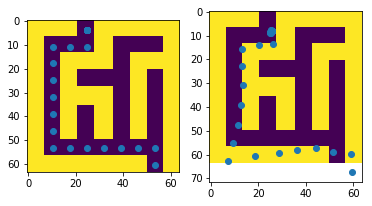

Train Epoch: 44 [79/80 (99%)] EnvLoss: 0.026549  RMSELoss: 5.106296 TotalLoss: 5.132843


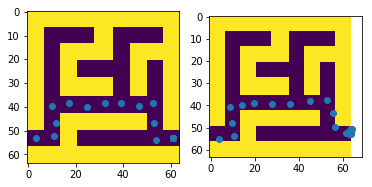

Train Epoch: 45 [79/80 (99%)] EnvLoss: 0.019724  RMSELoss: 4.651019 TotalLoss: 4.670742


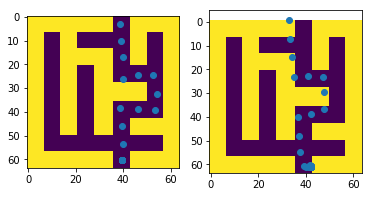

Train Epoch: 46 [79/80 (99%)] EnvLoss: 0.032203  RMSELoss: 5.102615 TotalLoss: 5.134820


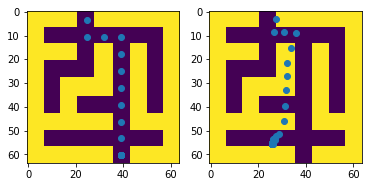

Train Epoch: 47 [79/80 (99%)] EnvLoss: 0.034499  RMSELoss: 5.166920 TotalLoss: 5.201420


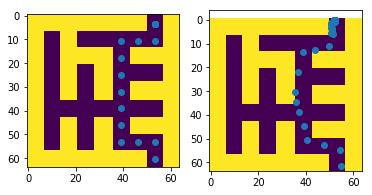

Train Epoch: 48 [79/80 (99%)] EnvLoss: 0.026425  RMSELoss: 5.225292 TotalLoss: 5.251718


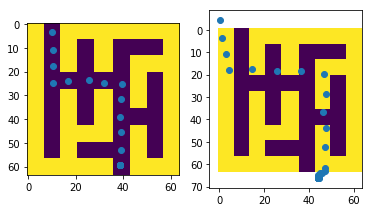

Train Epoch: 49 [79/80 (99%)] EnvLoss: 0.021852  RMSELoss: 4.376759 TotalLoss: 4.398610


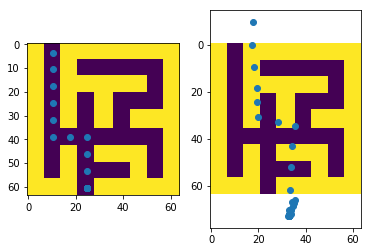

Train Epoch: 50 [79/80 (99%)] EnvLoss: 0.021921  RMSELoss: 4.791336 TotalLoss: 4.813257


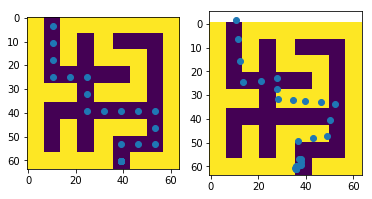

Train Epoch: 51 [79/80 (99%)] EnvLoss: 0.017788  RMSELoss: 4.717908 TotalLoss: 4.735695


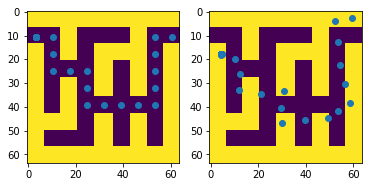

Train Epoch: 52 [79/80 (99%)] EnvLoss: 0.029832  RMSELoss: 4.664346 TotalLoss: 4.694177


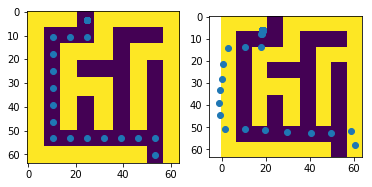

Train Epoch: 53 [79/80 (99%)] EnvLoss: 0.032763  RMSELoss: 5.167953 TotalLoss: 5.200715


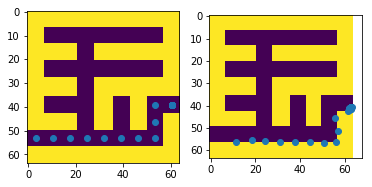

Train Epoch: 54 [79/80 (99%)] EnvLoss: 0.025657  RMSELoss: 5.130292 TotalLoss: 5.155950


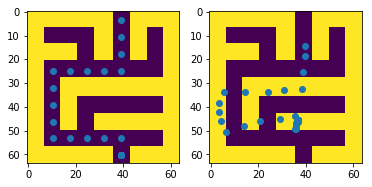

Train Epoch: 55 [79/80 (99%)] EnvLoss: 0.038315  RMSELoss: 4.789017 TotalLoss: 4.827333


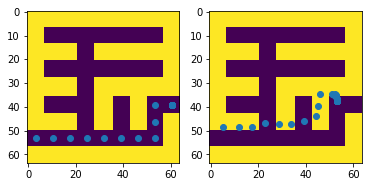

Train Epoch: 56 [79/80 (99%)] EnvLoss: 0.018283  RMSELoss: 4.687056 TotalLoss: 4.705339


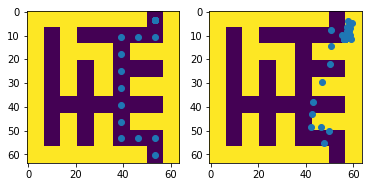

Train Epoch: 57 [79/80 (99%)] EnvLoss: 0.030432  RMSELoss: 4.873143 TotalLoss: 4.903576


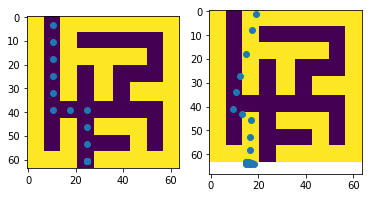

Train Epoch: 58 [79/80 (99%)] EnvLoss: 0.019477  RMSELoss: 4.594336 TotalLoss: 4.613813


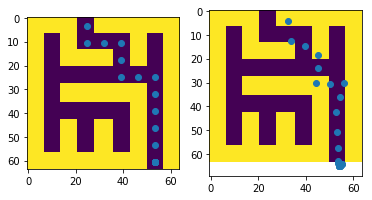

Train Epoch: 59 [79/80 (99%)] EnvLoss: 0.030891  RMSELoss: 4.274871 TotalLoss: 4.305761


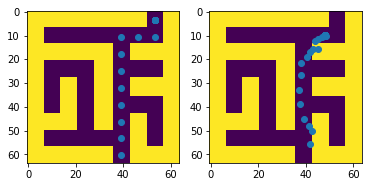

Train Epoch: 60 [79/80 (99%)] EnvLoss: 0.016445  RMSELoss: 4.413136 TotalLoss: 4.429581


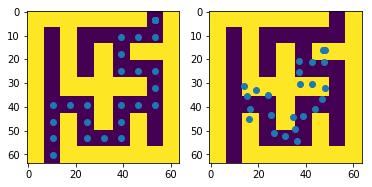

Train Epoch: 61 [79/80 (99%)] EnvLoss: 0.022783  RMSELoss: 4.253027 TotalLoss: 4.275811


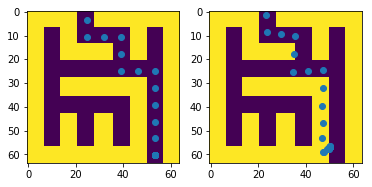

Train Epoch: 62 [79/80 (99%)] EnvLoss: 0.018584  RMSELoss: 4.391570 TotalLoss: 4.410154


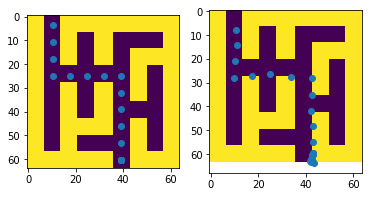

Train Epoch: 63 [79/80 (99%)] EnvLoss: 0.028103  RMSELoss: 4.721264 TotalLoss: 4.749368


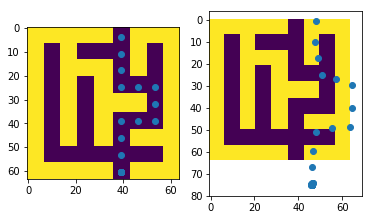

Train Epoch: 64 [79/80 (99%)] EnvLoss: 0.013441  RMSELoss: 4.062508 TotalLoss: 4.075949


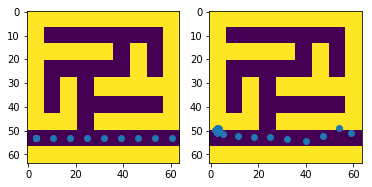

Train Epoch: 65 [79/80 (99%)] EnvLoss: 0.019881  RMSELoss: 4.506301 TotalLoss: 4.526183


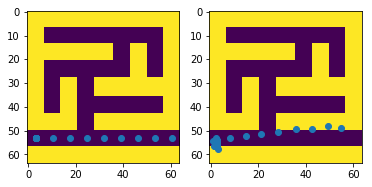

Train Epoch: 66 [79/80 (99%)] EnvLoss: 0.021800  RMSELoss: 4.483547 TotalLoss: 4.505349


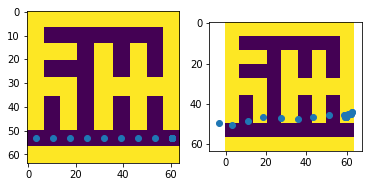

Train Epoch: 67 [79/80 (99%)] EnvLoss: 0.014695  RMSELoss: 4.822012 TotalLoss: 4.836705


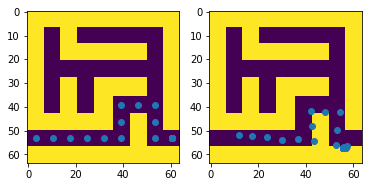

Train Epoch: 68 [79/80 (99%)] EnvLoss: 0.019864  RMSELoss: 4.216965 TotalLoss: 4.236829


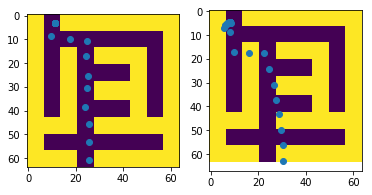

Train Epoch: 69 [79/80 (99%)] EnvLoss: 0.021178  RMSELoss: 4.079354 TotalLoss: 4.100532


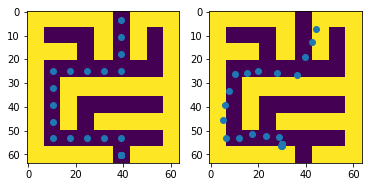

Train Epoch: 70 [79/80 (99%)] EnvLoss: 0.024032  RMSELoss: 4.494255 TotalLoss: 4.518287


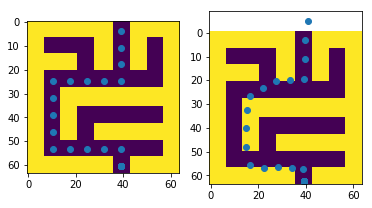

Train Epoch: 71 [79/80 (99%)] EnvLoss: 0.011338  RMSELoss: 3.843318 TotalLoss: 3.854655


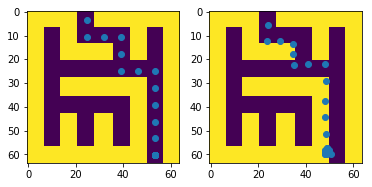

Train Epoch: 72 [79/80 (99%)] EnvLoss: 0.028530  RMSELoss: 3.921901 TotalLoss: 3.950433


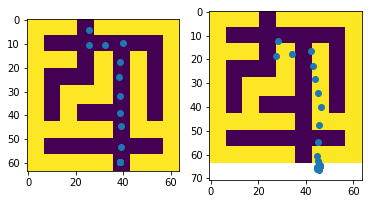

Train Epoch: 73 [79/80 (99%)] EnvLoss: 0.011988  RMSELoss: 4.334008 TotalLoss: 4.345998


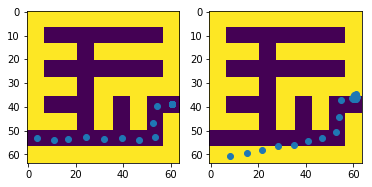

Train Epoch: 74 [79/80 (99%)] EnvLoss: 0.026304  RMSELoss: 4.485007 TotalLoss: 4.511310


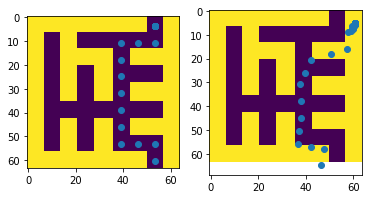

Train Epoch: 75 [79/80 (99%)] EnvLoss: 0.020513  RMSELoss: 3.957945 TotalLoss: 3.978458


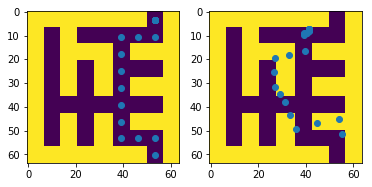

Train Epoch: 76 [79/80 (99%)] EnvLoss: 0.012917  RMSELoss: 4.493436 TotalLoss: 4.506354


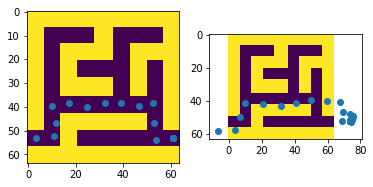

Train Epoch: 77 [79/80 (99%)] EnvLoss: 0.022454  RMSELoss: 4.304776 TotalLoss: 4.327229


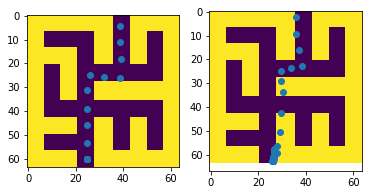

Train Epoch: 78 [79/80 (99%)] EnvLoss: 0.022339  RMSELoss: 4.378762 TotalLoss: 4.401101


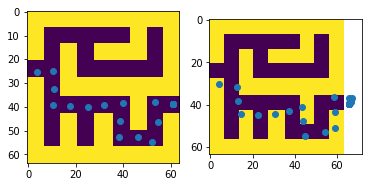

Train Epoch: 79 [79/80 (99%)] EnvLoss: 0.010695  RMSELoss: 4.235616 TotalLoss: 4.246312


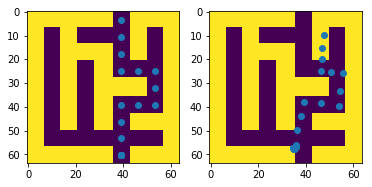

Train Epoch: 80 [79/80 (99%)] EnvLoss: 0.026927  RMSELoss: 4.184890 TotalLoss: 4.211819


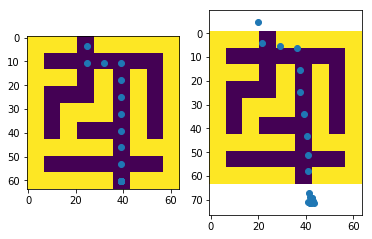

Train Epoch: 81 [79/80 (99%)] EnvLoss: 0.026437  RMSELoss: 3.899999 TotalLoss: 3.926436


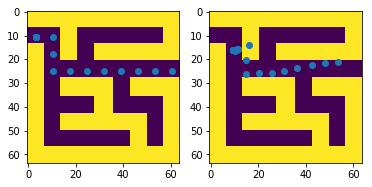

Train Epoch: 82 [79/80 (99%)] EnvLoss: 0.012938  RMSELoss: 4.259799 TotalLoss: 4.272737


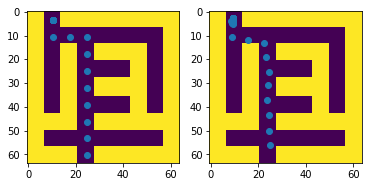

Train Epoch: 83 [79/80 (99%)] EnvLoss: 0.022247  RMSELoss: 4.197858 TotalLoss: 4.220104


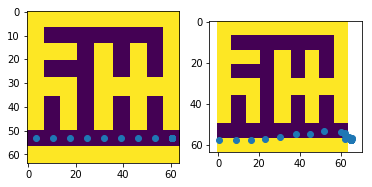

Train Epoch: 84 [79/80 (99%)] EnvLoss: 0.035638  RMSELoss: 3.939803 TotalLoss: 3.975441


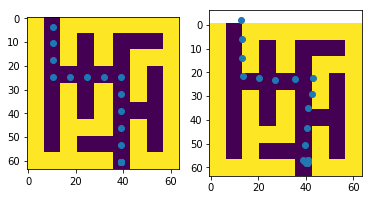

Train Epoch: 85 [79/80 (99%)] EnvLoss: 0.016601  RMSELoss: 3.974339 TotalLoss: 3.990938


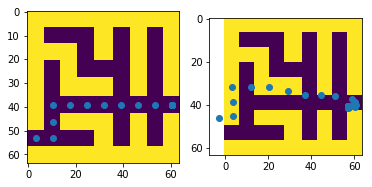

Train Epoch: 86 [79/80 (99%)] EnvLoss: 0.027197  RMSELoss: 4.244933 TotalLoss: 4.272130


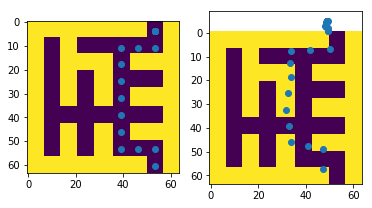

Train Epoch: 87 [79/80 (99%)] EnvLoss: 0.034561  RMSELoss: 4.053592 TotalLoss: 4.088152


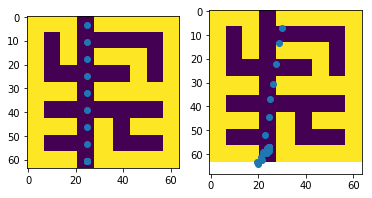

Train Epoch: 88 [79/80 (99%)] EnvLoss: 0.010773  RMSELoss: 3.755048 TotalLoss: 3.765820


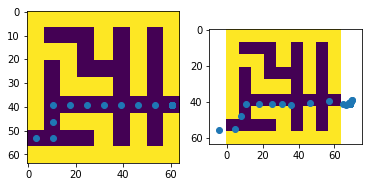

Train Epoch: 89 [79/80 (99%)] EnvLoss: 0.016112  RMSELoss: 4.120799 TotalLoss: 4.136909


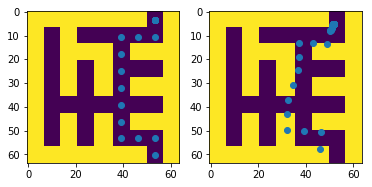

Train Epoch: 90 [79/80 (99%)] EnvLoss: 0.013590  RMSELoss: 4.255052 TotalLoss: 4.268642


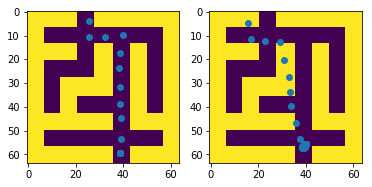

Train Epoch: 91 [79/80 (99%)] EnvLoss: 0.010575  RMSELoss: 4.013371 TotalLoss: 4.023946


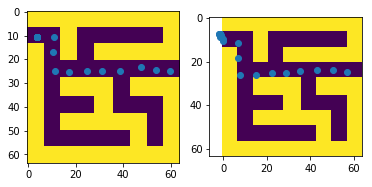

Train Epoch: 92 [79/80 (99%)] EnvLoss: 0.016371  RMSELoss: 4.044791 TotalLoss: 4.061164


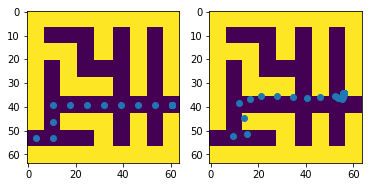

Train Epoch: 93 [79/80 (99%)] EnvLoss: 0.020564  RMSELoss: 3.754619 TotalLoss: 3.775183


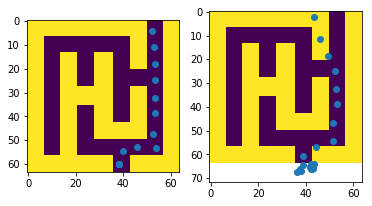

Train Epoch: 94 [79/80 (99%)] EnvLoss: 0.010817  RMSELoss: 3.524101 TotalLoss: 3.534918


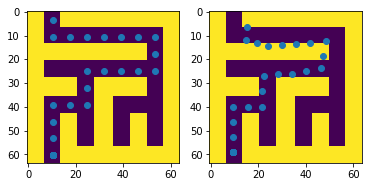

Train Epoch: 95 [79/80 (99%)] EnvLoss: 0.024549  RMSELoss: 4.077459 TotalLoss: 4.102008


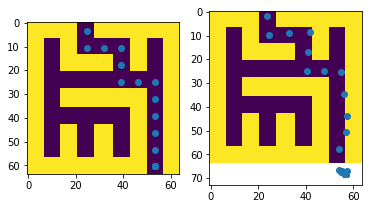

Train Epoch: 96 [79/80 (99%)] EnvLoss: 0.016653  RMSELoss: 4.070894 TotalLoss: 4.087546


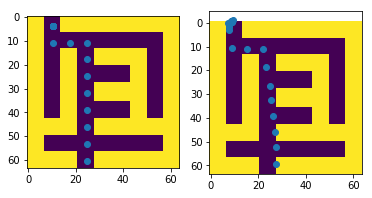

Train Epoch: 97 [79/80 (99%)] EnvLoss: 0.012677  RMSELoss: 3.876371 TotalLoss: 3.889049


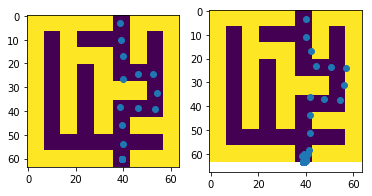

Train Epoch: 98 [79/80 (99%)] EnvLoss: 0.019926  RMSELoss: 4.064215 TotalLoss: 4.084142


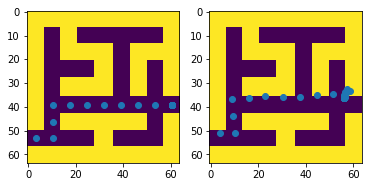

Train Epoch: 99 [79/80 (99%)] EnvLoss: 0.013874  RMSELoss: 4.262740 TotalLoss: 4.276614


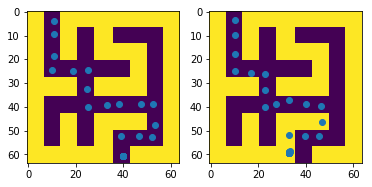

Train Epoch: 100 [79/80 (99%)] EnvLoss: 0.029702  RMSELoss: 3.843917 TotalLoss: 3.873619


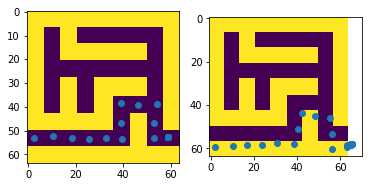

Train Epoch: 101 [79/80 (99%)] EnvLoss: 0.012573  RMSELoss: 3.719037 TotalLoss: 3.731610


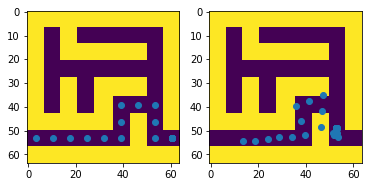

Train Epoch: 102 [79/80 (99%)] EnvLoss: 0.015680  RMSELoss: 4.017088 TotalLoss: 4.032770


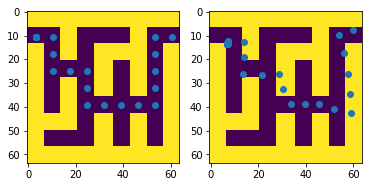

Train Epoch: 103 [79/80 (99%)] EnvLoss: 0.011675  RMSELoss: 3.794915 TotalLoss: 3.806590


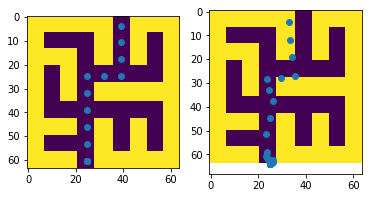

Train Epoch: 104 [79/80 (99%)] EnvLoss: 0.009055  RMSELoss: 3.704742 TotalLoss: 3.713797


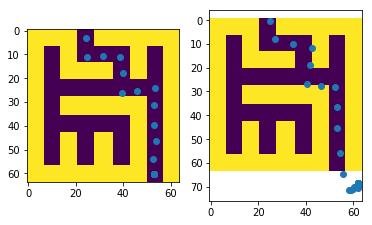

Train Epoch: 105 [79/80 (99%)] EnvLoss: 0.028230  RMSELoss: 4.126182 TotalLoss: 4.154413


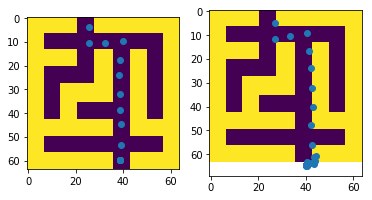

Train Epoch: 106 [79/80 (99%)] EnvLoss: 0.010241  RMSELoss: 3.764153 TotalLoss: 3.774395


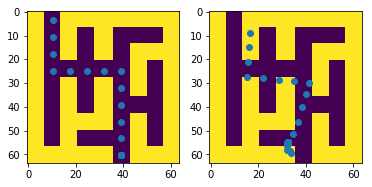

Train Epoch: 107 [79/80 (99%)] EnvLoss: 0.023646  RMSELoss: 4.484719 TotalLoss: 4.508366


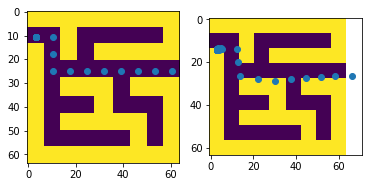

Train Epoch: 108 [79/80 (99%)] EnvLoss: 0.010136  RMSELoss: 4.304328 TotalLoss: 4.314463


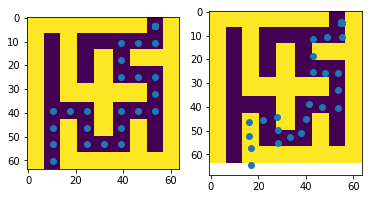

Train Epoch: 109 [79/80 (99%)] EnvLoss: 0.016742  RMSELoss: 3.775486 TotalLoss: 3.792229


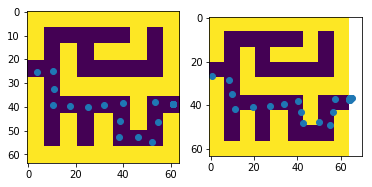

Train Epoch: 110 [79/80 (99%)] EnvLoss: 0.041880  RMSELoss: 3.782631 TotalLoss: 3.824511


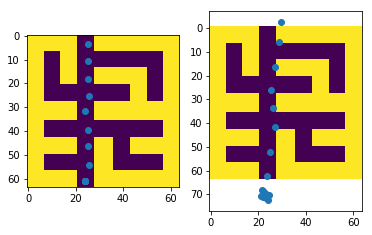

Train Epoch: 111 [79/80 (99%)] EnvLoss: 0.018493  RMSELoss: 3.730629 TotalLoss: 3.749123


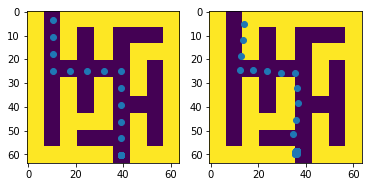

Train Epoch: 112 [79/80 (99%)] EnvLoss: 0.032389  RMSELoss: 4.092739 TotalLoss: 4.125127


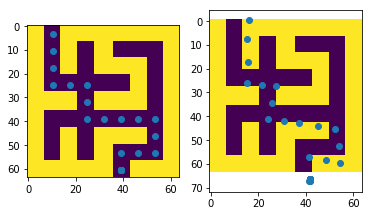

Train Epoch: 113 [79/80 (99%)] EnvLoss: 0.015387  RMSELoss: 3.904132 TotalLoss: 3.919519


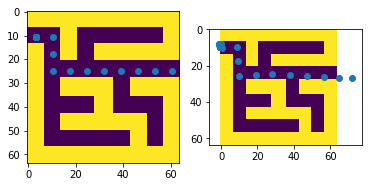

Train Epoch: 114 [79/80 (99%)] EnvLoss: 0.026414  RMSELoss: 4.039261 TotalLoss: 4.065674


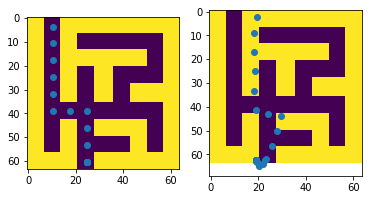

Train Epoch: 115 [79/80 (99%)] EnvLoss: 0.011155  RMSELoss: 3.777282 TotalLoss: 3.788437


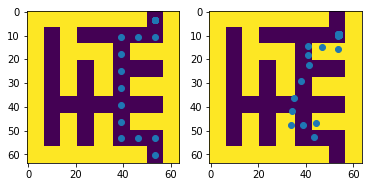

Train Epoch: 116 [79/80 (99%)] EnvLoss: 0.011691  RMSELoss: 4.363396 TotalLoss: 4.375086


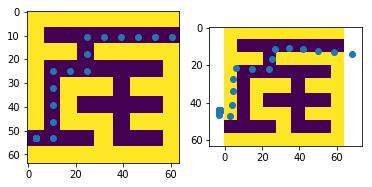

Train Epoch: 117 [79/80 (99%)] EnvLoss: 0.017182  RMSELoss: 3.760477 TotalLoss: 3.777659


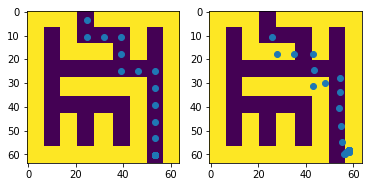

Train Epoch: 118 [79/80 (99%)] EnvLoss: 0.035188  RMSELoss: 3.994631 TotalLoss: 4.029819


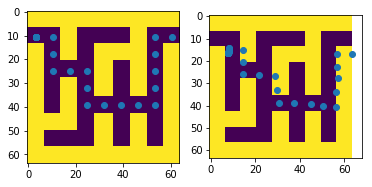

Train Epoch: 119 [79/80 (99%)] EnvLoss: 0.020440  RMSELoss: 4.076762 TotalLoss: 4.097203


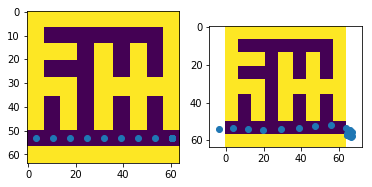

Train Epoch: 120 [79/80 (99%)] EnvLoss: 0.027475  RMSELoss: 3.642708 TotalLoss: 3.670182


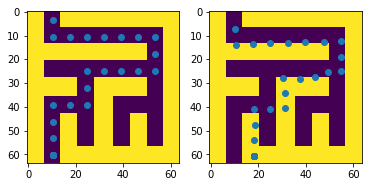

Train Epoch: 121 [79/80 (99%)] EnvLoss: 0.025920  RMSELoss: 4.192418 TotalLoss: 4.218337


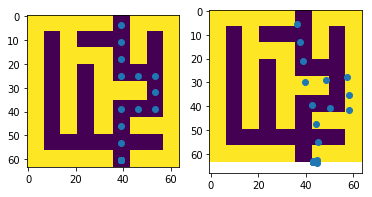

Train Epoch: 122 [79/80 (99%)] EnvLoss: 0.022824  RMSELoss: 3.831812 TotalLoss: 3.854637


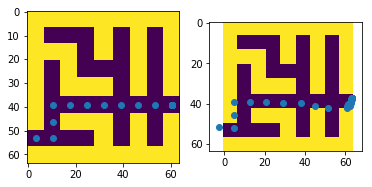

Train Epoch: 123 [79/80 (99%)] EnvLoss: 0.007679  RMSELoss: 3.865378 TotalLoss: 3.873058


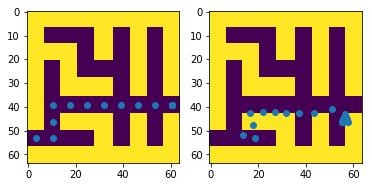

Train Epoch: 124 [79/80 (99%)] EnvLoss: 0.011620  RMSELoss: 3.572891 TotalLoss: 3.584512


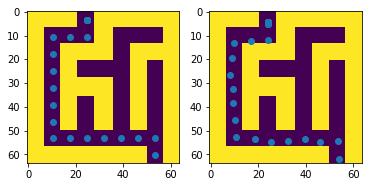

Train Epoch: 125 [79/80 (99%)] EnvLoss: 0.019895  RMSELoss: 3.887265 TotalLoss: 3.907161


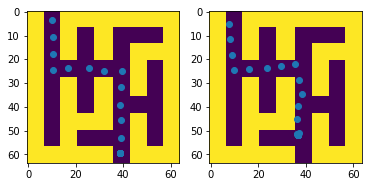

Train Epoch: 126 [79/80 (99%)] EnvLoss: 0.019524  RMSELoss: 3.934708 TotalLoss: 3.954232


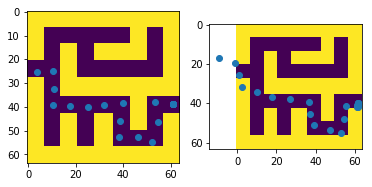

Train Epoch: 127 [79/80 (99%)] EnvLoss: 0.031267  RMSELoss: 3.713322 TotalLoss: 3.744590


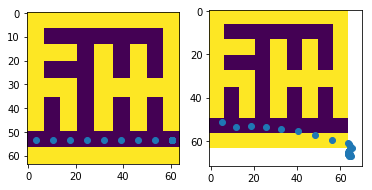

Train Epoch: 128 [79/80 (99%)] EnvLoss: 0.009040  RMSELoss: 3.885617 TotalLoss: 3.894657


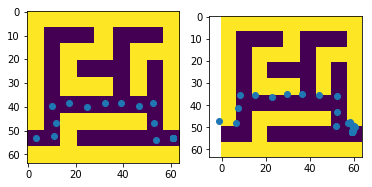

Train Epoch: 129 [79/80 (99%)] EnvLoss: 0.014881  RMSELoss: 3.758411 TotalLoss: 3.773293


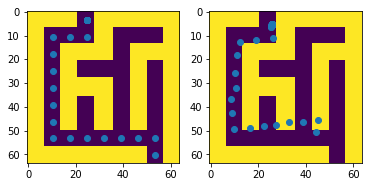

Train Epoch: 130 [79/80 (99%)] EnvLoss: 0.033314  RMSELoss: 3.616854 TotalLoss: 3.650167


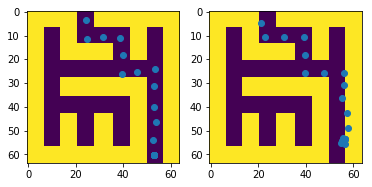

Train Epoch: 131 [79/80 (99%)] EnvLoss: 0.023272  RMSELoss: 3.960210 TotalLoss: 3.983482


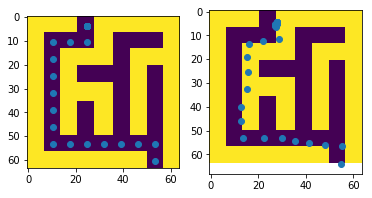

Train Epoch: 132 [79/80 (99%)] EnvLoss: 0.038463  RMSELoss: 3.712180 TotalLoss: 3.750643


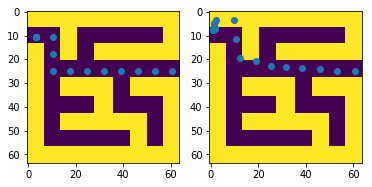

Train Epoch: 133 [79/80 (99%)] EnvLoss: 0.018876  RMSELoss: 3.653539 TotalLoss: 3.672415


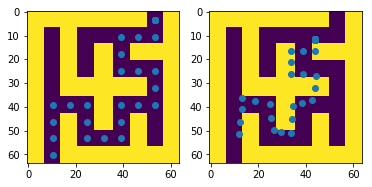

Train Epoch: 134 [79/80 (99%)] EnvLoss: 0.017444  RMSELoss: 3.652522 TotalLoss: 3.669966


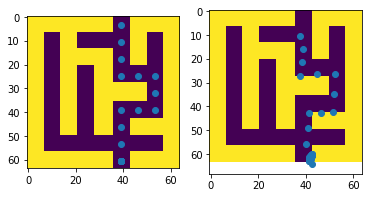

Train Epoch: 135 [79/80 (99%)] EnvLoss: 0.011563  RMSELoss: 3.935596 TotalLoss: 3.947157


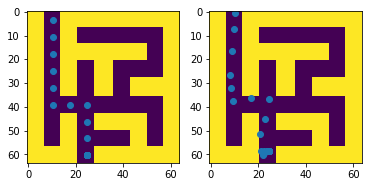

Train Epoch: 136 [79/80 (99%)] EnvLoss: 0.021573  RMSELoss: 3.623372 TotalLoss: 3.644944


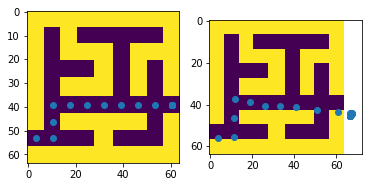

Train Epoch: 137 [79/80 (99%)] EnvLoss: 0.010895  RMSELoss: 3.902865 TotalLoss: 3.913760


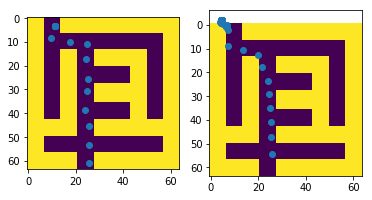

Train Epoch: 138 [79/80 (99%)] EnvLoss: 0.007989  RMSELoss: 3.432845 TotalLoss: 3.440834


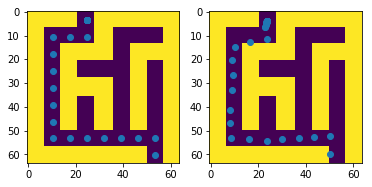

Train Epoch: 139 [79/80 (99%)] EnvLoss: 0.021872  RMSELoss: 3.666638 TotalLoss: 3.688510


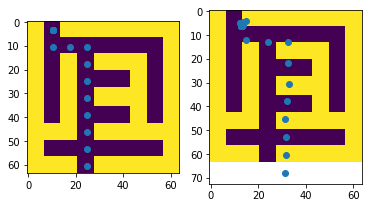

Train Epoch: 140 [79/80 (99%)] EnvLoss: 0.012283  RMSELoss: 3.777028 TotalLoss: 3.789310


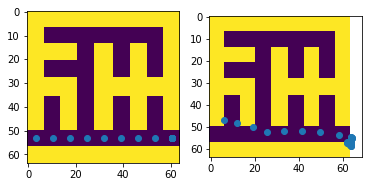

Train Epoch: 141 [79/80 (99%)] EnvLoss: 0.029532  RMSELoss: 3.906493 TotalLoss: 3.936025


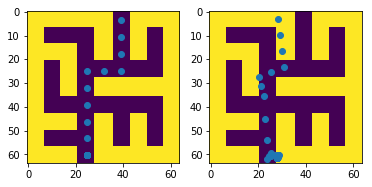

Train Epoch: 142 [79/80 (99%)] EnvLoss: 0.019859  RMSELoss: 3.794660 TotalLoss: 3.814519


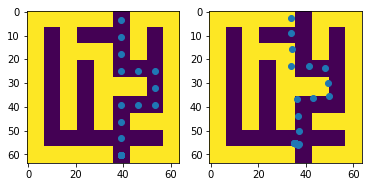

Train Epoch: 143 [79/80 (99%)] EnvLoss: 0.021519  RMSELoss: 3.614201 TotalLoss: 3.635722


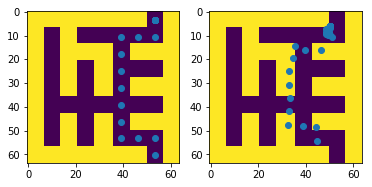

Train Epoch: 144 [79/80 (99%)] EnvLoss: 0.024530  RMSELoss: 3.404876 TotalLoss: 3.429406


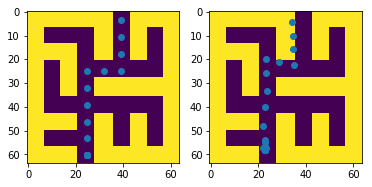

Train Epoch: 145 [79/80 (99%)] EnvLoss: 0.026382  RMSELoss: 3.250066 TotalLoss: 3.276448


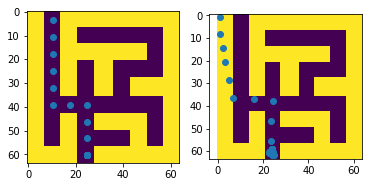

Train Epoch: 146 [79/80 (99%)] EnvLoss: 0.012184  RMSELoss: 3.590336 TotalLoss: 3.602519


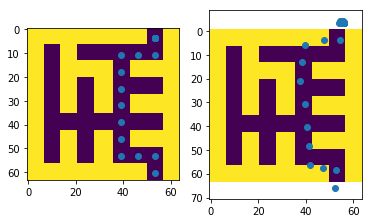

Train Epoch: 147 [79/80 (99%)] EnvLoss: 0.020362  RMSELoss: 3.439797 TotalLoss: 3.460159


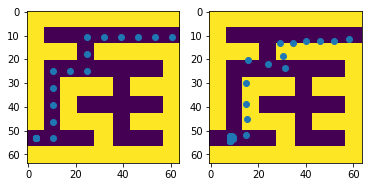

Train Epoch: 148 [79/80 (99%)] EnvLoss: 0.017066  RMSELoss: 3.417067 TotalLoss: 3.434132


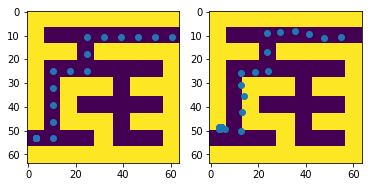

Train Epoch: 149 [79/80 (99%)] EnvLoss: 0.027002  RMSELoss: 3.553278 TotalLoss: 3.580280


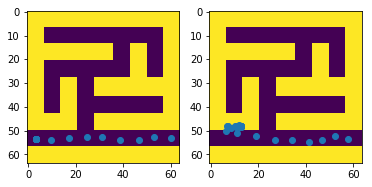

Train Epoch: 150 [79/80 (99%)] EnvLoss: 0.021713  RMSELoss: 3.622171 TotalLoss: 3.643885


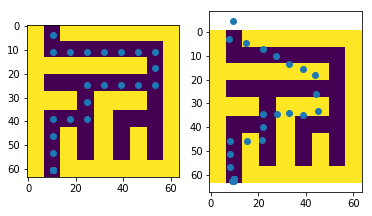

Train Epoch: 151 [79/80 (99%)] EnvLoss: 0.022857  RMSELoss: 3.350471 TotalLoss: 3.373330


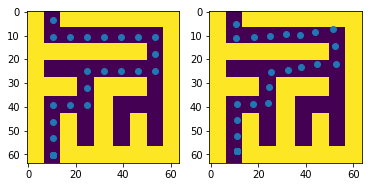

Train Epoch: 152 [79/80 (99%)] EnvLoss: 0.032070  RMSELoss: 3.733634 TotalLoss: 3.765705


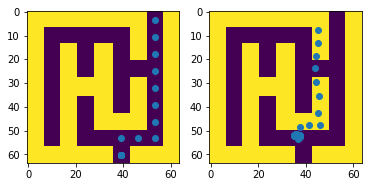

Train Epoch: 153 [79/80 (99%)] EnvLoss: 0.034317  RMSELoss: 3.656671 TotalLoss: 3.690987


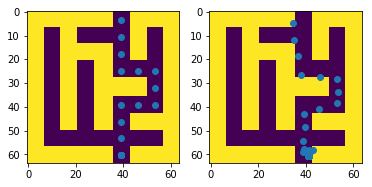

Train Epoch: 154 [79/80 (99%)] EnvLoss: 0.008043  RMSELoss: 3.295210 TotalLoss: 3.303252


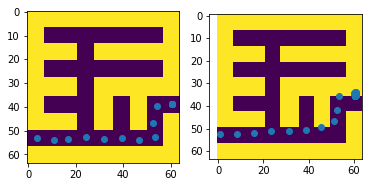

Train Epoch: 155 [79/80 (99%)] EnvLoss: 0.022874  RMSELoss: 4.141545 TotalLoss: 4.164419


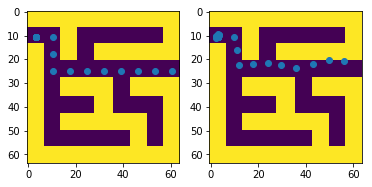

Train Epoch: 156 [79/80 (99%)] EnvLoss: 0.017999  RMSELoss: 3.843655 TotalLoss: 3.861654


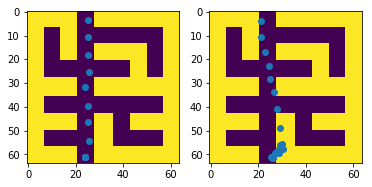

Train Epoch: 157 [79/80 (99%)] EnvLoss: 0.018959  RMSELoss: 3.722480 TotalLoss: 3.741439


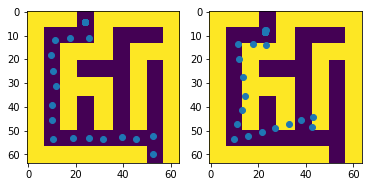

Train Epoch: 158 [79/80 (99%)] EnvLoss: 0.007506  RMSELoss: 3.762145 TotalLoss: 3.769650


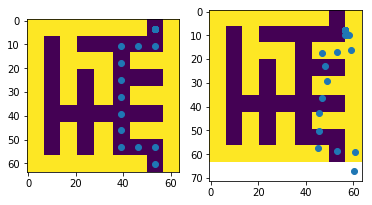

Train Epoch: 159 [79/80 (99%)] EnvLoss: 0.009491  RMSELoss: 3.510386 TotalLoss: 3.519877


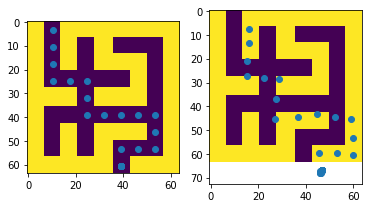

Train Epoch: 160 [79/80 (99%)] EnvLoss: 0.018366  RMSELoss: 3.498297 TotalLoss: 3.516662


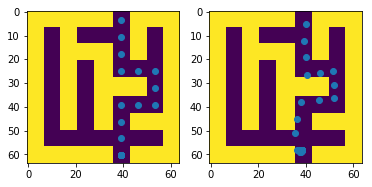

Train Epoch: 161 [79/80 (99%)] EnvLoss: 0.022685  RMSELoss: 3.512333 TotalLoss: 3.535018


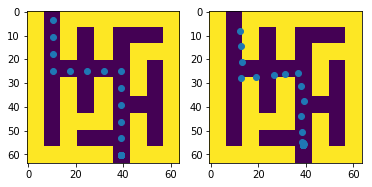

Train Epoch: 162 [79/80 (99%)] EnvLoss: 0.009975  RMSELoss: 3.333545 TotalLoss: 3.343521


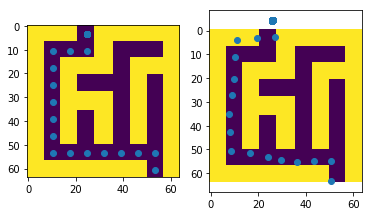

Train Epoch: 163 [79/80 (99%)] EnvLoss: 0.010609  RMSELoss: 3.580658 TotalLoss: 3.591267


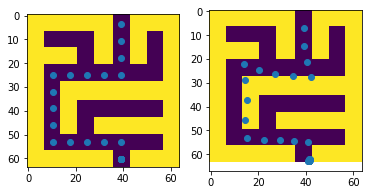

Train Epoch: 164 [79/80 (99%)] EnvLoss: 0.018797  RMSELoss: 3.978622 TotalLoss: 3.997420


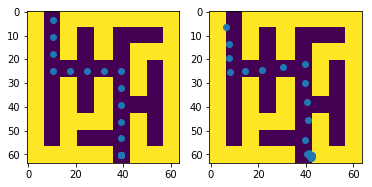

Train Epoch: 165 [79/80 (99%)] EnvLoss: 0.016880  RMSELoss: 3.753149 TotalLoss: 3.770030


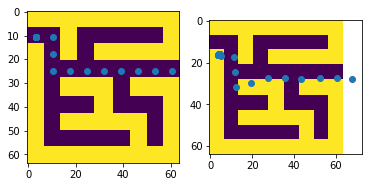

Train Epoch: 166 [79/80 (99%)] EnvLoss: 0.017035  RMSELoss: 3.622760 TotalLoss: 3.639795


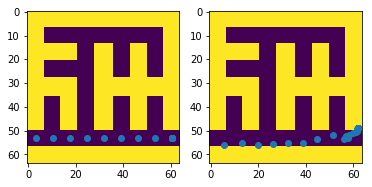

Train Epoch: 167 [79/80 (99%)] EnvLoss: 0.006936  RMSELoss: 3.216561 TotalLoss: 3.223497


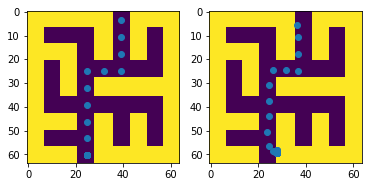

Train Epoch: 168 [79/80 (99%)] EnvLoss: 0.011275  RMSELoss: 3.392339 TotalLoss: 3.403614


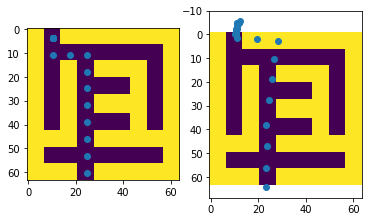

Train Epoch: 169 [79/80 (99%)] EnvLoss: 0.025558  RMSELoss: 3.320157 TotalLoss: 3.345715


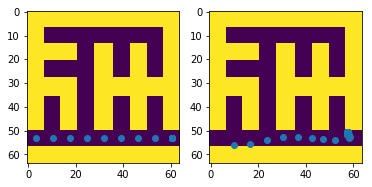

Train Epoch: 170 [79/80 (99%)] EnvLoss: 0.017373  RMSELoss: 3.552700 TotalLoss: 3.570073


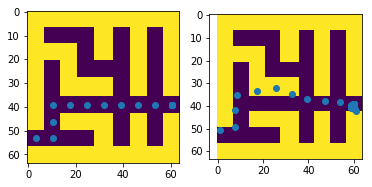

Train Epoch: 171 [79/80 (99%)] EnvLoss: 0.027406  RMSELoss: 3.277959 TotalLoss: 3.305365


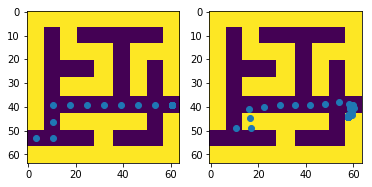

Train Epoch: 172 [79/80 (99%)] EnvLoss: 0.015038  RMSELoss: 3.676585 TotalLoss: 3.691623


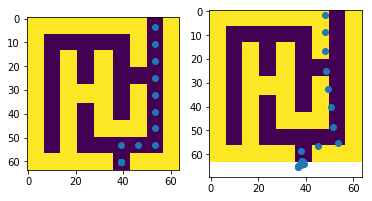

Train Epoch: 173 [79/80 (99%)] EnvLoss: 0.030830  RMSELoss: 3.501076 TotalLoss: 3.531905


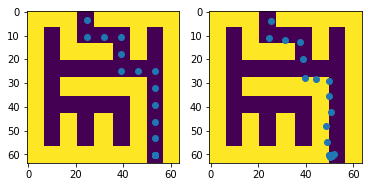

Train Epoch: 174 [79/80 (99%)] EnvLoss: 0.023957  RMSELoss: 3.603564 TotalLoss: 3.627521


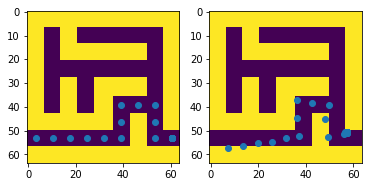

Train Epoch: 175 [79/80 (99%)] EnvLoss: 0.012655  RMSELoss: 3.651879 TotalLoss: 3.664534


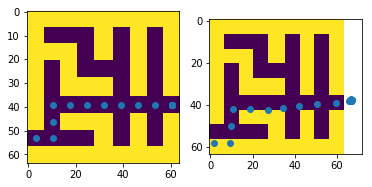

Train Epoch: 176 [79/80 (99%)] EnvLoss: 0.018034  RMSELoss: 3.732709 TotalLoss: 3.750744


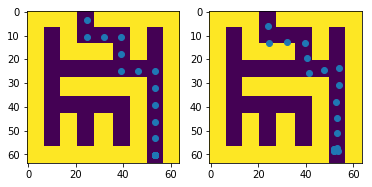

Train Epoch: 177 [79/80 (99%)] EnvLoss: 0.020369  RMSELoss: 3.547808 TotalLoss: 3.568178


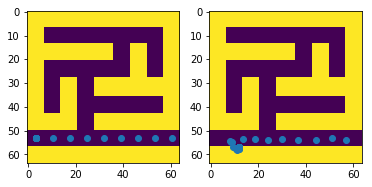

Train Epoch: 178 [79/80 (99%)] EnvLoss: 0.023740  RMSELoss: 3.750688 TotalLoss: 3.774429


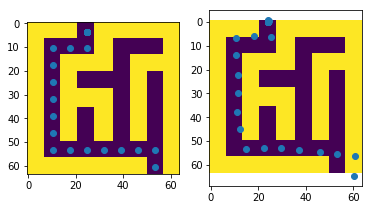

Train Epoch: 179 [79/80 (99%)] EnvLoss: 0.019969  RMSELoss: 3.633659 TotalLoss: 3.653628


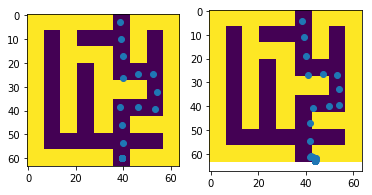

Train Epoch: 180 [79/80 (99%)] EnvLoss: 0.009642  RMSELoss: 3.628917 TotalLoss: 3.638557


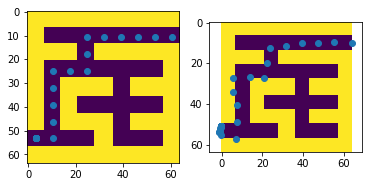

Train Epoch: 181 [79/80 (99%)] EnvLoss: 0.018459  RMSELoss: 4.156025 TotalLoss: 4.174484


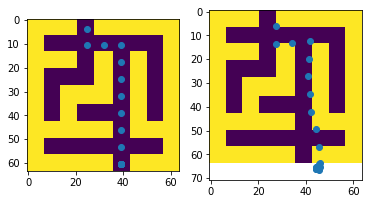

Train Epoch: 182 [79/80 (99%)] EnvLoss: 0.016284  RMSELoss: 3.352739 TotalLoss: 3.369024


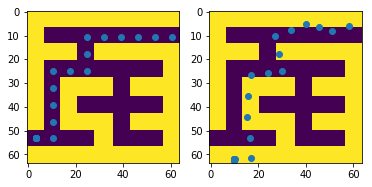

Train Epoch: 183 [79/80 (99%)] EnvLoss: 0.027843  RMSELoss: 3.603172 TotalLoss: 3.631014


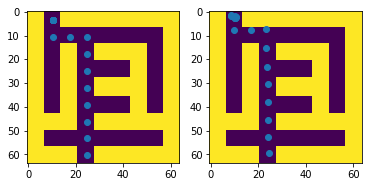

Train Epoch: 184 [79/80 (99%)] EnvLoss: 0.035477  RMSELoss: 3.511377 TotalLoss: 3.546854


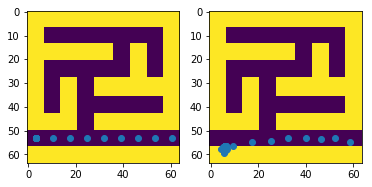

Train Epoch: 185 [79/80 (99%)] EnvLoss: 0.013493  RMSELoss: 3.442173 TotalLoss: 3.455665


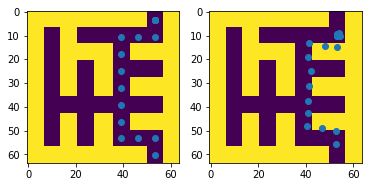

Train Epoch: 186 [79/80 (99%)] EnvLoss: 0.034634  RMSELoss: 3.130322 TotalLoss: 3.164956


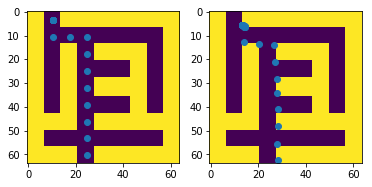

Train Epoch: 187 [79/80 (99%)] EnvLoss: 0.010524  RMSELoss: 3.540176 TotalLoss: 3.550702


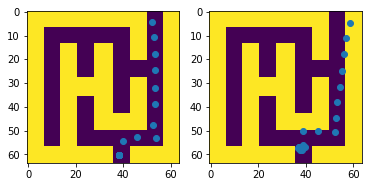

Train Epoch: 188 [79/80 (99%)] EnvLoss: 0.014301  RMSELoss: 3.255926 TotalLoss: 3.270227


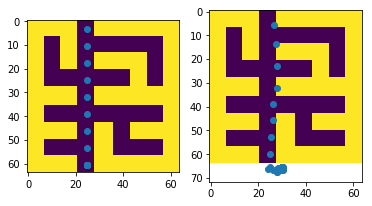

Train Epoch: 189 [79/80 (99%)] EnvLoss: 0.019036  RMSELoss: 3.104913 TotalLoss: 3.123950


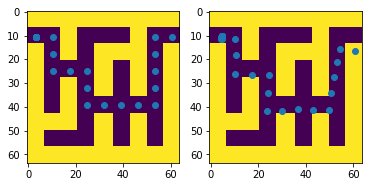

Train Epoch: 190 [79/80 (99%)] EnvLoss: 0.010399  RMSELoss: 3.289491 TotalLoss: 3.299891


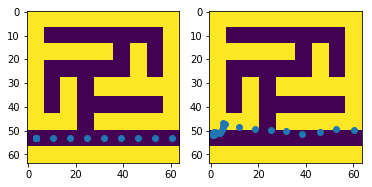

Train Epoch: 191 [79/80 (99%)] EnvLoss: 0.006919  RMSELoss: 3.482684 TotalLoss: 3.489603


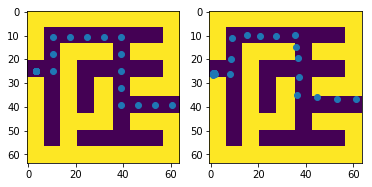

Train Epoch: 192 [79/80 (99%)] EnvLoss: 0.009869  RMSELoss: 3.801099 TotalLoss: 3.810968


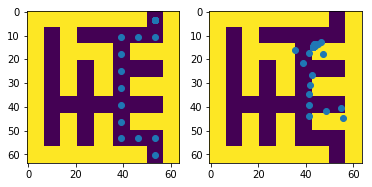

Train Epoch: 193 [79/80 (99%)] EnvLoss: 0.016473  RMSELoss: 3.578568 TotalLoss: 3.595041


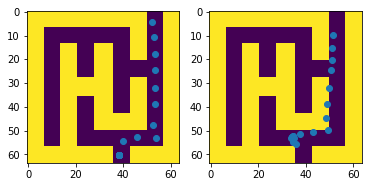

Train Epoch: 194 [79/80 (99%)] EnvLoss: 0.022749  RMSELoss: 3.563652 TotalLoss: 3.586403


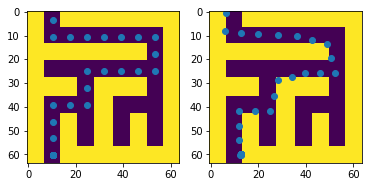

Train Epoch: 195 [79/80 (99%)] EnvLoss: 0.006458  RMSELoss: 3.236091 TotalLoss: 3.242548


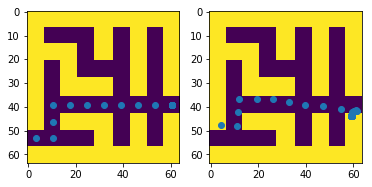

Train Epoch: 196 [79/80 (99%)] EnvLoss: 0.018878  RMSELoss: 3.311606 TotalLoss: 3.330484


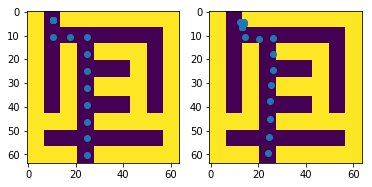

Train Epoch: 197 [79/80 (99%)] EnvLoss: 0.007014  RMSELoss: 3.211092 TotalLoss: 3.218106


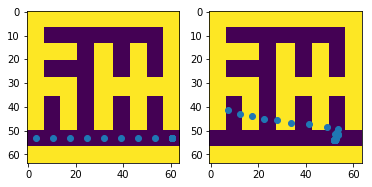

Train Epoch: 198 [79/80 (99%)] EnvLoss: 0.018263  RMSELoss: 3.602110 TotalLoss: 3.620373


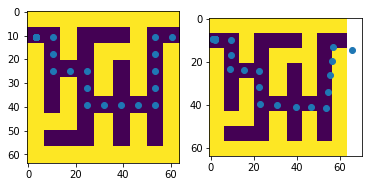

Train Epoch: 199 [79/80 (99%)] EnvLoss: 0.008778  RMSELoss: 3.146771 TotalLoss: 3.155549


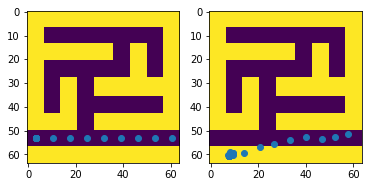

Train Epoch: 200 [79/80 (99%)] EnvLoss: 0.011696  RMSELoss: 3.248055 TotalLoss: 3.259750


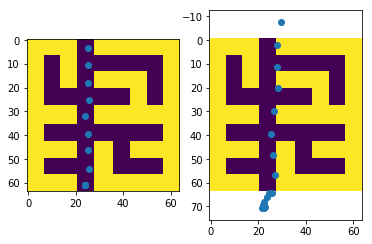

In [5]:
net2.train()
print('Init training loop...')

for epoch in range(1, epochs+1):
    iters = 0.0
    total_env = 0.0
    total_rmse = 0.0

    for batch_idx, (data, target, path, goals, expert_flag) in enumerate(trainloader):
        # Convert X, Y to Torch variables
        grid = data   # save numpy version of maze grid

        # Convert input and target to tensors
        data, target = Variable(data), Variable(target)
        data, target = data.to(device).float(), target.to(device).float()
 
        # Set gradient to zero
        optimizer.zero_grad()

        # Get network output
        output = net2(data)

        # RMSE loss
        rmse_loss = rmse(output, target)
        r_loss = road_loss(torch.tensor(grid).reshape(64,64), output.reshape(-1,2).int())

        # Environmental Loss
        grid = grid[0][0].detach().numpy()
        #path = path[0].detach().numpy()
        #goals = goals[0].detach().numpy()
        output = output[0].detach().cpu().numpy()

        # Reconstruct predicted grids
        pred_grid = torch.tensor(draw_solution_canvas(grid, output)).double().to(device)
        #pred_path = torch.tensor(draw_solution_canvas(path, output)).double().to(device)
        #pred_goals = torch.tensor(draw_goals_canvas(grid, output)).double().to(device)

        # Compute graphic losses
        # Wall loss
        #wall_loss = graphic_loss(torch.tensor(grid).to(device), pred_grid)
        # Path planning loss 
        #path_loss = graphic_loss(torch.tensor(path).to(device), pred_path)
        #path_loss = abs(wall_loss-path_loss)
        # Goals loss
        #goal_loss = graphic_loss(torch.tensor(goals).to(device), pred_goals)
        # Non-expert trajectory loss
        #env_loss = Variable((wall_loss + path_loss), requires_grad=True)/20 #
        
        # Final loss
        loss = rmse_loss + r_loss #+ Variable(wall_loss) #env_loss
        
        env_loss = r_loss #Variable(wall_loss)
    
        # Backpropagate loss & udpate gradient
        loss.backward()
        optimizer.step()

        # Print information
        iters += loss
        total_env += env_loss
        total_rmse+= rmse_loss

        print('Train Epoch: {} [{}/{} ({:.0f}%)] EnvLoss: {:.6f}  RMSELoss: {:.6f} TotalLoss: {:.6f}'.format(
                    epoch, batch_idx, len(trainloader.dataset),
                    100. * (batch_idx) / len(trainloader), 
                    total_env/len(trainloader), 
                    total_rmse/len(trainloader),
                    iters/len(trainloader)
                    ), 
                    end='\r', flush=True)
    print("")                                 
    #fig, ax = plt.subplots(1,2)
    #ax[0].imshow(grid)
    #ax[0].scatter(target[0][:,1], target[0][:,0])

    #ax[1].imshow(grid)   
    #ax[1].scatter(output[:,1], output[:,0])

    #plt.show()


In [8]:
#torch.save(net, 'trained_custom_model')

In [6]:
#output
#plt.imshow(data.reshape(64,64))

In [ ]:
#output.reshape(-1,2)

In [24]:
data[0].shape

torch.Size([1, 64, 64])

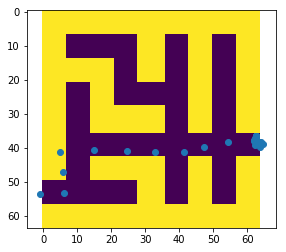

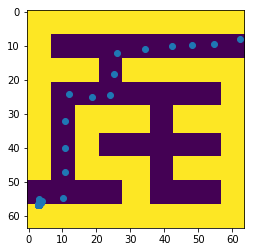

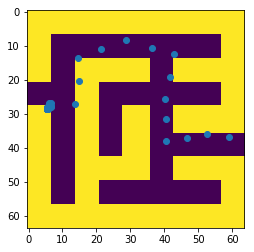

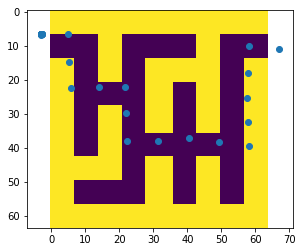

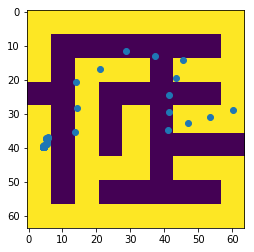

tensor(4.0646)


In [35]:
net2.test()
tl = []
for i, (data, target, path, goals, expert_flag) in enumerate(testloader):
    # Convert input and target to tensors
    data, target = Variable(data), Variable(target)
    data, target = data.to(device).float(), target.to(device).float()
    # Get network output
    output = net2(data)

    # RMSE loss
    rmse_loss = rmse(output, target)
    #print(rmse_loss)
    tl.append(rmse_loss)

    plt.imshow(data[0][0])#output[:,:].detach().numpy())
    plt.scatter(output[:,:,1].detach().numpy(), output[:,:,0].detach().numpy())
    plt.show()
    
    #print(i)
    if i == 4:
        break
print(torch.tensor(tl).mean())



## New loss function

In [2]:
# Create CNN model
net = ConvNet().to(device)
print('CNN created...')

# Init losses
rmse = RMSELoss()
graphic_loss = GraphicLoss()
road_loss = RoadLoss(k1=0.1)

# Set optimizer (Adam)
optimizer = Adam(net.parameters(), lr=1e-3)
epochs = 200
print('Losses and optimizer created...')


CNN created...
Losses and optimizer created...


In [3]:
net.train()
print('Init training loop...')

for epoch in range(1, epochs+1):
    iters = 0.0
    total_env = 0.0
    total_rmse = 0.0

    for batch_idx, (data, target, path, goals, expert_flag) in enumerate(trainloader):
        # Convert X, Y to Torch variables
        grid = data   # save numpy version of maze grid

        # Convert input and target to tensors
        data, target = Variable(data), Variable(target)
        data, target = data.to(device).float(), target.to(device).float()
 
        # Set gradient to zero
        optimizer.zero_grad()

        # Get network output
        output = net(data)

        # RMSE loss
        rmse_loss = rmse(output, target)
        r_loss = road_loss(torch.tensor(grid).reshape(64,64), output.reshape(-1,2).int())

        # Environmental Loss
        grid = grid[0][0].detach().numpy()
        #path = path[0].detach().numpy()
        #goals = goals[0].detach().numpy()
        output = output[0].detach().cpu().numpy()

        # Reconstruct predicted grids
        pred_grid = torch.tensor(draw_solution_canvas(grid, output)).double().to(device)
        #pred_path = torch.tensor(draw_solution_canvas(path, output)).double().to(device)
        #pred_goals = torch.tensor(draw_goals_canvas(grid, output)).double().to(device)

        # Compute graphic losses
        # Wall loss
        #wall_loss = graphic_loss(torch.tensor(grid).to(device), pred_grid)
        # Path planning loss 
        #path_loss = graphic_loss(torch.tensor(path).to(device), pred_path)
        #path_loss = abs(wall_loss-path_loss)
        # Goals loss
        #goal_loss = graphic_loss(torch.tensor(goals).to(device), pred_goals)
        # Non-expert trajectory loss
        #env_loss = Variable((wall_loss + path_loss), requires_grad=True)/20 #
        
        # Final loss
        loss = rmse_loss + r_loss #+ Variable(wall_loss) #env_loss
        
        env_loss = r_loss #Variable(wall_loss)
    
        # Backpropagate loss & udpate gradient
        loss.backward()
        optimizer.step()

        # Print information
        iters += loss
        total_env += env_loss
        total_rmse+= rmse_loss

        print('Train Epoch: {} [{}/{} ({:.0f}%)] EnvLoss: {:.6f}  RMSELoss: {:.6f} TotalLoss: {:.6f}'.format(
                    epoch, batch_idx, len(trainloader.dataset),
                    100. * (batch_idx) / len(trainloader), 
                    total_env/len(trainloader), 
                    total_rmse/len(trainloader),
                    iters/len(trainloader)
                    ), 
                    end='\r', flush=True)
    print("")                                 
    #fig, ax = plt.subplots(1,2)
    #ax[0].imshow(grid)
    #ax[0].scatter(target[0][:,1], target[0][:,0])

    #ax[1].imshow(grid)   
    #ax[1].scatter(output[:,1], output[:,0])

    #plt.show()


Init training loop...


/anaconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Train Epoch: 1 [79/80 (99%)] EnvLoss: 0.636702  RMSELoss: 25.650944 TotalLoss: 26.287643
Train Epoch: 2 [79/80 (99%)] EnvLoss: 0.668282  RMSELoss: 23.326250 TotalLoss: 23.994528
Train Epoch: 3 [79/80 (99%)] EnvLoss: 0.716733  RMSELoss: 22.896145 TotalLoss: 23.612875


KeyboardInterrupt: 

In [ ]:
net.test()
tl = []
for i, (data, target, path, goals, expert_flag) in enumerate(testloader):
    # Convert input and target to tensors
    data, target = Variable(data), Variable(target)
    data, target = data.to(device).float(), target.to(device).float()
    # Get network output
    output = net(data)

    # RMSE loss
    rmse_loss = rmse(output, target)
    #print(rmse_loss)
    tl.append(rmse_loss)

    plt.imshow(data[0][0])#output[:,:].detach().numpy())
    plt.scatter(output[:,:,1].detach().numpy(), output[:,:,0].detach().numpy())
    plt.show()
    
    #print(i)
    if i == 4:
        break
print(torch.tensor(tl).mean())

